In [1]:
import sys
sys.path.append('..')

import torch
from torch import nn
import matplotlib.pyplot as plt
from experiments.plotting import plotting_experiment_results

from pishield.propositional_constraints.constraint import Constraint
from pishield.propositional_constraints.constraints_group import ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

torch.manual_seed(1)

cpu


### Define the shapes

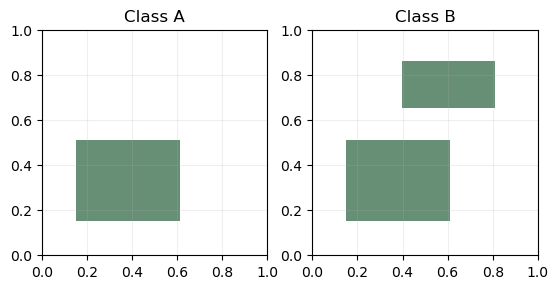

In [2]:
rectangle0 = Rectangle(0.15, 0.6, 0.15, 0.5)
rectangle1 = Rectangle(0.4, 0.8, 0.65, 0.85)
combined = rectangle0 | rectangle1
shapes = [rectangle0, combined]

fig, ax = plt.subplots(1, len(shapes))
ax[0].set_title("Class A")
ax[1].set_title("Class B")
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)

for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True, cmap='Greens')
plt.show()

# constraints = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints_path = '../constraints/rectangles'

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 20),
            nn.Tanh(),
            nn.Linear(20, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

In [4]:
# model = torch.load('./models/rectangles-0.00018966-1707145194.pth')

In [5]:
experiment = Experiment('rectangles', model, shapes, constraints_path)
experiment.run(800)
experiment.save(dir='./models/')

[] [<pishield.propositional_constraints.constraint.Constraint object at 0x7fe3392b4790>]
head 1 with old rules 1
head 1 with new rules 1
Generated 1 strata of constraints with None centrality
Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.705424 [    0/ 2500]
Test Error: 
 Accuracy: 84.6%, 22.8%
 Avg loss: 0.000264 
Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.658560 [    0/ 2500]
Test Error: 
 Accuracy: 84.6%, 77.2%
 Avg loss: 0.000209 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.530845 [    0/ 2500]
Test Error: 
 Accuracy: 84.6%, 77.2%
 Avg loss: 0.000193 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.498956 [    0/ 2500]
Test Error: 
 Accuracy: 84.6%, 77.2%
 Avg loss: 0.000204 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.533498 [    0/

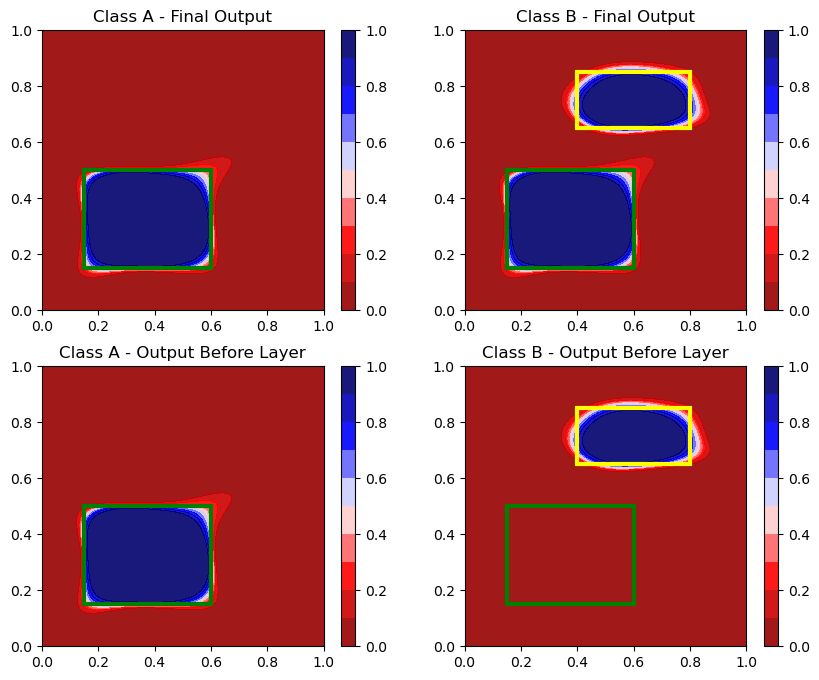

In [6]:
plotting_experiment_results(experiment, model, rectangle0, rectangle1)
plt.show()

In [7]:
# Probably it would be good to have a "violations counter" (just to show that there are indeed no violations)
# And maybe see when you are creating the video, but it might be good to split the top row from the bottom row
# Also, I think you can train the network in real time, I tried with 20 neurons and 400 epochs and it trains almost instantly  

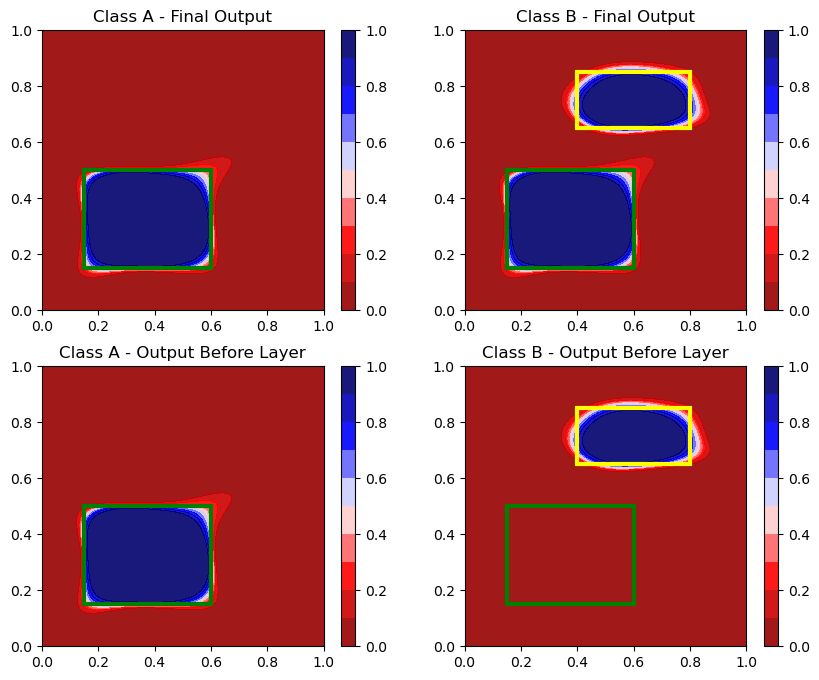

In [8]:
plotting_experiment_results(experiment, model, rectangle0, rectangle1)
plt.show()